# Importações

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

# Funções auxiliares

In [2]:
def show_image(image, title, figsize=(8, 8)):
    plt.figure(figsize=figsize)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Leitura da imagem

Shape: (1500, 1200, 3)


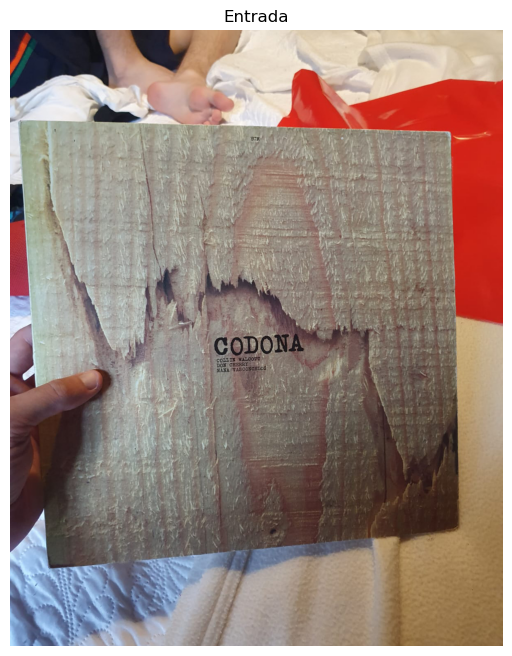

In [3]:
image_path = "images/codona.jpg"

image_rgb = cv2.imread(image_path, cv2.IMREAD_COLOR_RGB)

print(f"Shape: {image_rgb.shape}")
y_size, x_size, _ = image_rgb.shape

show_image(image_rgb, "Entrada")

# Definindo keypoints

#### Descritor BRIEF que será utilizado

In [4]:
orb_descriptor = cv2.ORB_create()

image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

## Amostragem aleatória

In [5]:
random_kps = []
for i in range(300):
    keypoint = cv2.KeyPoint()
    keypoint.pt = (random.randint(0, x_size), random.randint(0, y_size))
    keypoint.size = 40
    random_kps.append(keypoint)

### Descrevendo keypoints

In [6]:
descriptors_random_kps = orb_descriptor.compute(image_gray, random_kps)

print(f"{len(random_kps)} keypoints definidos")
print(f"Tamanho do código definido: {len(descriptors_random_kps[1][0])}")
print(f"Código para o primeiro keypoint: {descriptors_random_kps[1][0]}")

300 keypoints definidos
Tamanho do código definido: 32
Código para o primeiro keypoint: [221  34 142  18 170 177   8  81 162 241 133 221 141 130 210 139   7  34
 236 157 181  79 134  32 218   1  56 249 142 133 139  17]


### Visualizando keypoints

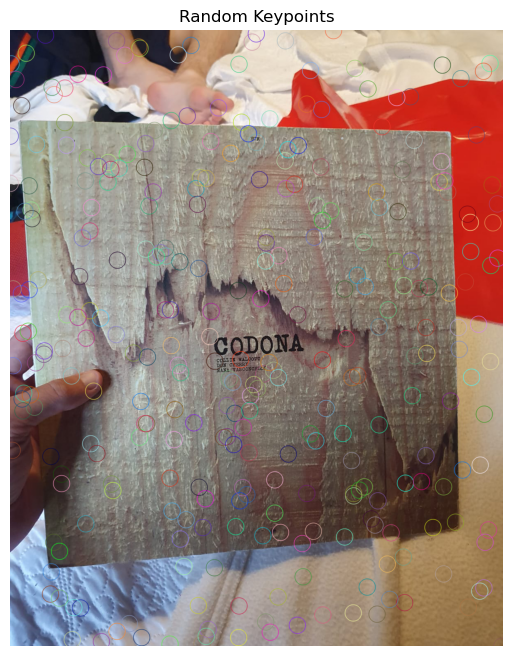

In [7]:
random_kps_img = cv2.drawKeypoints(image_rgb, random_kps, np.array([]), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

show_image(random_kps_img, "Random Keypoints")

## Grid 15x15

In [8]:
grid_kps = []
for i in range(0, x_size, 15):
    for j in range(0, y_size, 15):
        a = (i, j)
        b = (i, j + 15)
        c = (i + 15, j)
        d = (i + 15, j + 15)

        keypoint = cv2.KeyPoint()
        keypoint.pt = ((c[0] + b[0]) / 2, (a[1] + b[1]) / 2)
        keypoint.size = 5
        grid_kps.append(keypoint)

### Descrevendo keypoints

In [9]:
descriptors_grid_kps = orb_descriptor.compute(image_gray, grid_kps)

print(f"{len(grid_kps)} keypoints definidos")
print(f"Tamanho do código definido: {len(descriptors_grid_kps[1][0])}")
print(f"Código para o primeiro keypoint: {descriptors_grid_kps[1][0]}")

8000 keypoints definidos
Tamanho do código definido: 32
Código para o primeiro keypoint: [199  38 141  19 162  40 173 151  58 243   2 252 148  34 223  63   7  71
 120 159 177  84 239  98  12  10 125 228 140 241 131 117]


### Visualizando keypoints

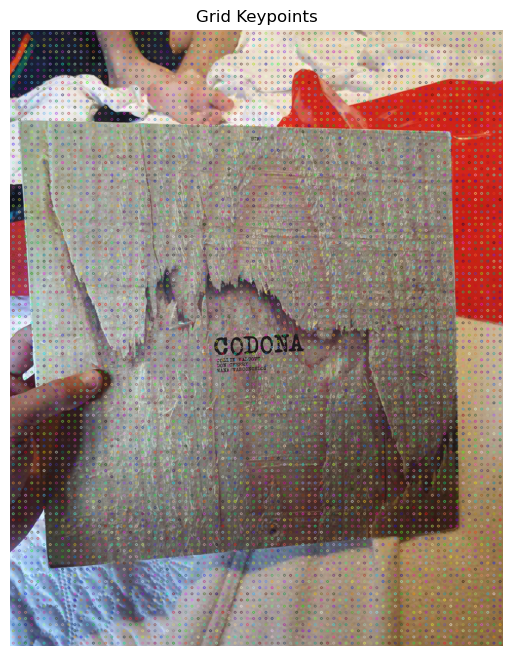

In [10]:
grid_kps_img = cv2.drawKeypoints(image_rgb, grid_kps, np.array([]), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

show_image(grid_kps_img, "Grid Keypoints")

## Amostragem por detecção utilizando FAST Detector

In [11]:
orb = cv2.ORB_create()

orb_kps = orb.detect(image_gray, None)

### Descrevendo keypoints

In [12]:
descriptors_orb_kps = orb_descriptor.compute(image_gray, orb_kps)

print(f"{len(orb_kps)} keypoints definidos")
print(f"Tamanho do código definido: {len(descriptors_orb_kps[1][0])}")
print(f"Código para o primeiro keypoint: {descriptors_orb_kps[1][0]}")

500 keypoints definidos
Tamanho do código definido: 32
Código para o primeiro keypoint: [ 59 157   3 170 213 213 206 245   5  65 220  78  47 215 168 164 124 170
 150 232 123 187  56 191 184 213 142 106  63 142 185 156]


### Visualizando keypoints

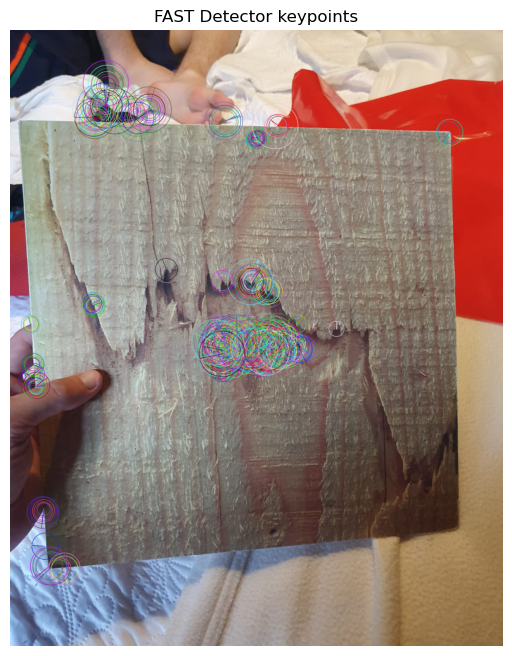

In [13]:
if(len(orb_kps) > 0):
    orb_kps_img = cv2.drawKeypoints(image_rgb, orb_kps, np.array([]), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    show_image(orb_kps_img, "FAST Detector keypoints")
else:
    print("Nenhum keypoint foi detectado.")